## Stock Price Prediction

In [4]:
#predict a signal that indicates whether buying a particular stock will be helpful or not by using ML.

In [5]:
#importing the library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from xgboost import XGBClassifier  #contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.

from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

### Reading The Data ###

In [6]:
#This dataset contains Apple's (AAPL) stock data for the last 10 years (from 2010 to 2020)
data = pd.read_csv(r"C:\Users\sa200\Desktop\Sakshi\Projects\TSLA.csv")

In [7]:
#the first 10 rows of the dataset
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


In [8]:
#the last 5 rows of the dataset
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [9]:
#if we observe closely we can see that we have same values in the close and adj close columns.As having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

data = data.drop(['Adj Close'], axis= 1)

### Missing Values ###

In [10]:
# Missing data
data.isnull().sum()

#no null values in the data

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Exploratory Data Analysis

In [11]:
data.columns #columns of the dataset

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [12]:
data.shape #shape of the data

(2416, 6)

In [13]:
data.describe() #statistical description of the data

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


In [14]:
# information of the data

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2416 non-null   object 
 1   Open    2416 non-null   float64
 2   High    2416 non-null   float64
 3   Low     2416 non-null   float64
 4   Close   2416 non-null   float64
 5   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 113.4+ KB
None


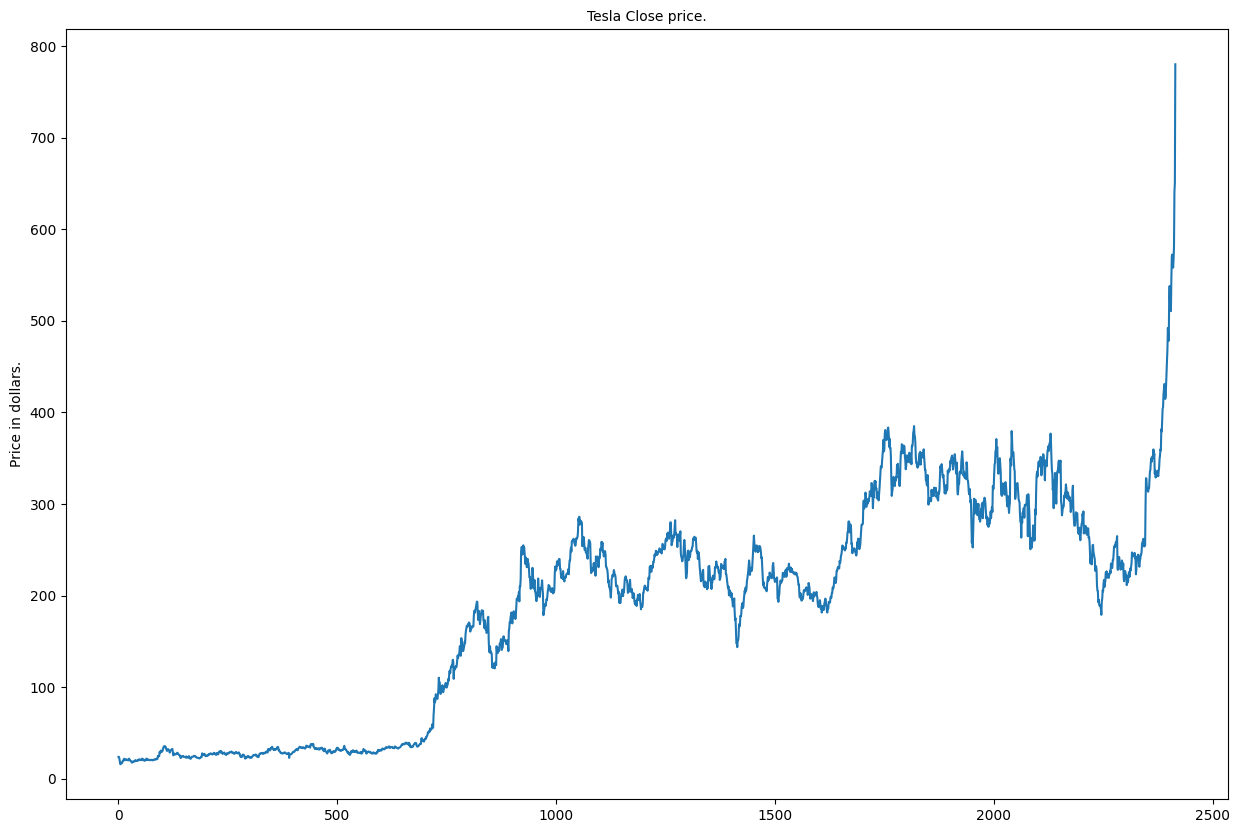

In [15]:
#analysis on how the prices moved over time.

plt.figure(figsize=(15,10))
plt.plot(data['Close'])
plt.title('Tesla Close price.', fontsize=10)
plt.ylabel('Price in dollars.')
plt.show()

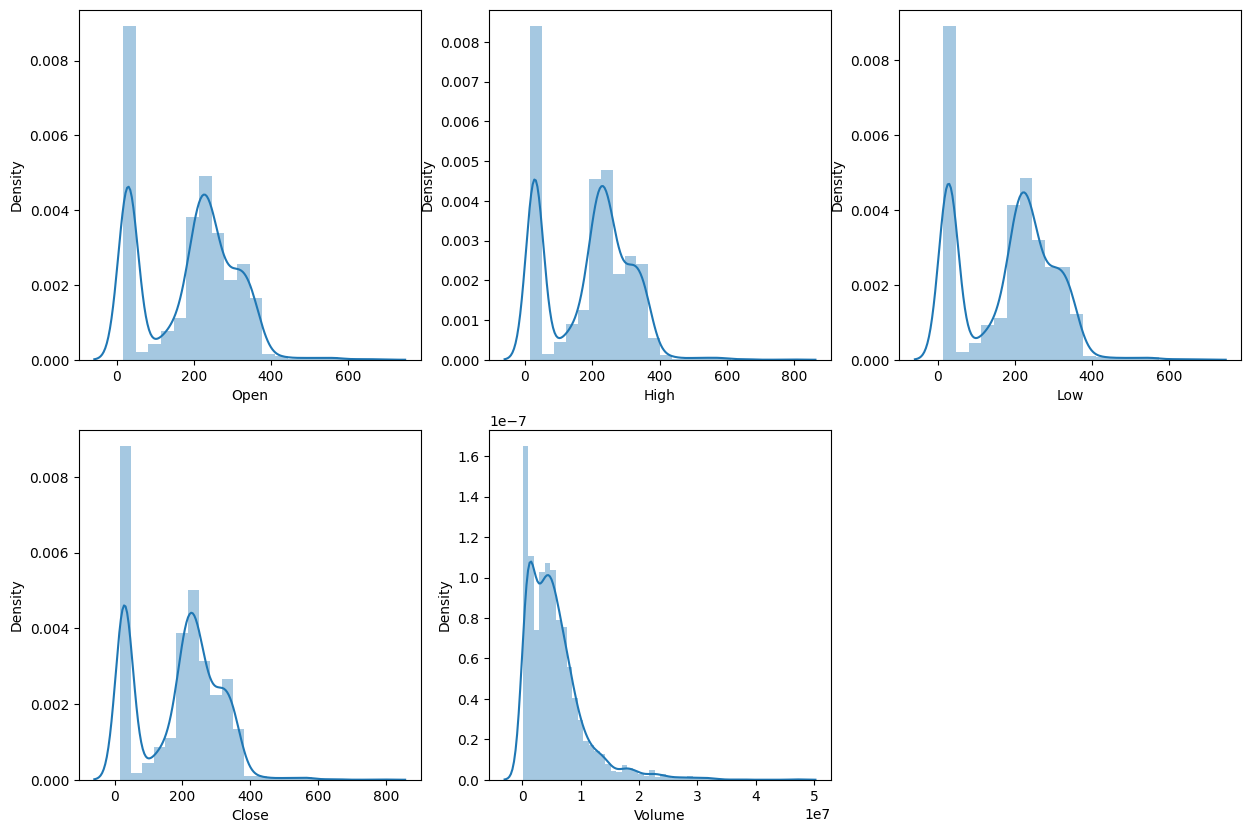

In [16]:
#distribution plot of the continuous values 
column = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(15,10))
 
for i, col in enumerate(column):
  plt.subplot(2,3,i+1)
  sns.distplot(data[col])
plt.show()

# the plot have mostly 2 peaks which indicates that the data is varied into two different regions.

### Outlier Detection

{'whiskers': [<matplotlib.lines.Line2D at 0x1b984c12c90>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9849e3fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b98484a950>],
 'medians': [<matplotlib.lines.Line2D at 0x1b984c1d150>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b984c13650>],
 'means': []}

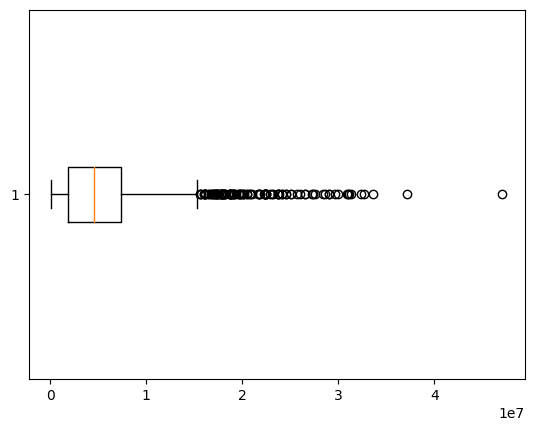

In [17]:
plt.boxplot(data['Volume'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b984c5ecd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b984c70210>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b984c5e350>],
 'medians': [<matplotlib.lines.Line2D at 0x1b984c70a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b984c5fe50>],
 'means': []}

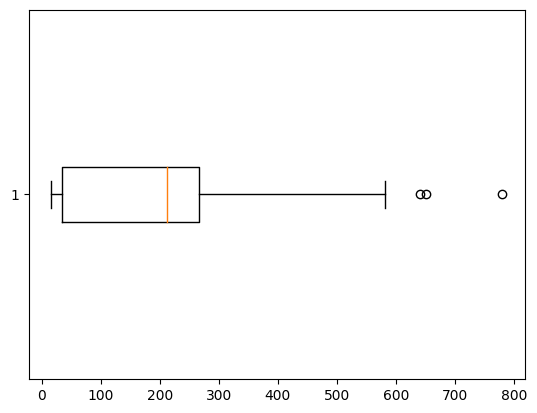

In [18]:
plt.boxplot(data['Close'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b984cd9850>,
 'caps': [<matplotlib.lines.Line2D at 0x1b984cdb050>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b984cd8d50>],
 'medians': [<matplotlib.lines.Line2D at 0x1b984ce0690>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b984ce1090>],
 'means': []}

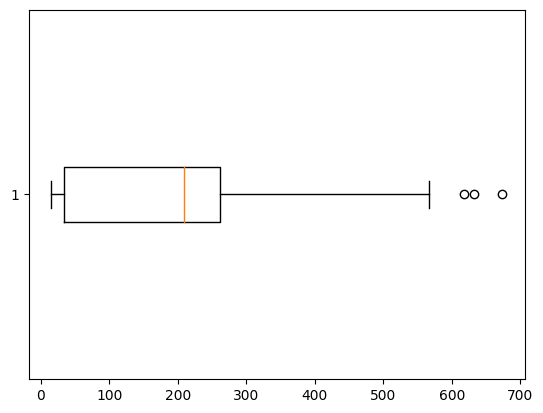

In [19]:
plt.boxplot(data['Low'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b984d498d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b984d4b210>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b984d48b90>],
 'medians': [<matplotlib.lines.Line2D at 0x1b984d54750>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b984d4ac10>],
 'means': []}

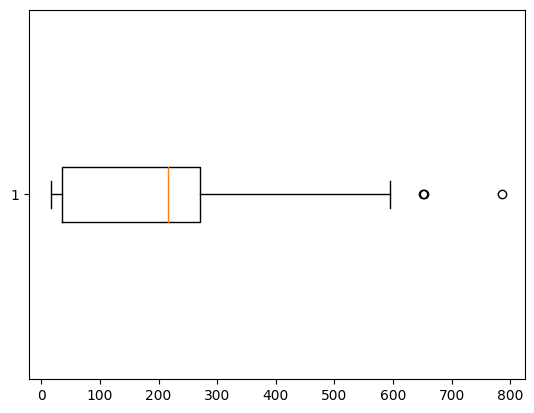

In [20]:
plt.boxplot(data['High'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b98a339810>,
 'caps': [<matplotlib.lines.Line2D at 0x1b98a33afd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b98a338cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b98a340550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b98a341090>],
 'means': []}

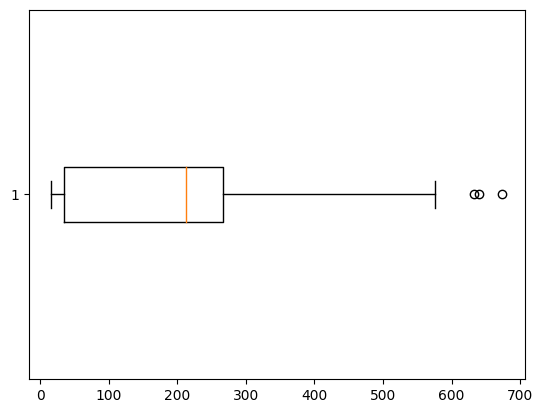

In [21]:
plt.boxplot(data['Open'],vert=False)

In [22]:
#### There are some outliers in each of the columns but the most in volume 

### Feature Engineering

In [23]:
data['Date'] = pd.to_datetime(data['Date'])
# Create new columns
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

data.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


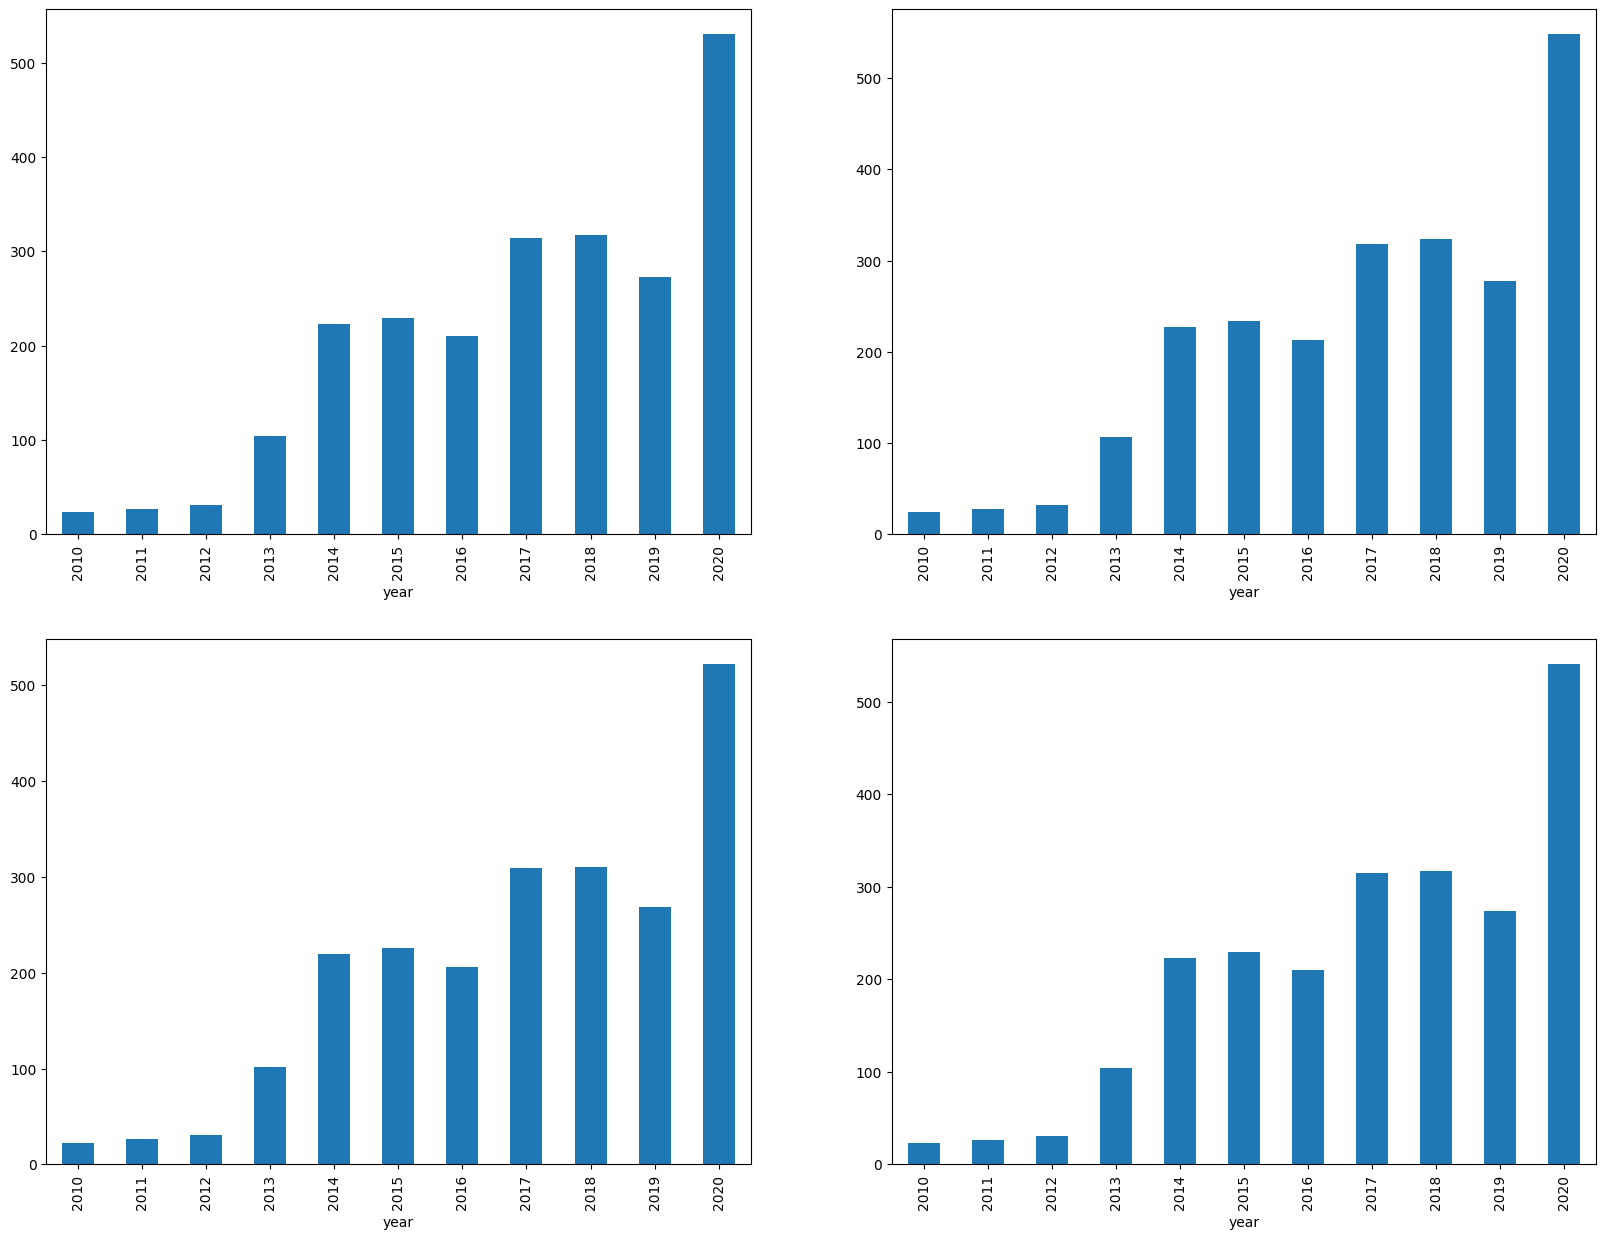

In [24]:
c2= ['Open', 'High', 'Low', 'Close']
data_grouped = data.groupby('year').mean()
plt.subplots(figsize=(20,15))
 
for i, col in enumerate(c2):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [25]:
# Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we will add this feature to help with the learning model

data['quarter_end'] = np.where(data['month']%3==0,1,0)
data.head()

,Date,Open,High,Low,Close,Volume,day,month,year,quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


In [26]:
data.groupby('quarter_end').mean()

,Date,Open,High,Low,Close,Volume,day,month,year
quarter_end,,,,,,,,,
0,2015-04-15 12:01:46.930693120,185.875081,189.254226,182.449499,186.085081,5.767062e+06,15.710396,6.173886,2014.816213
1,2015-04-15 09:25:12.000000000,187.071200,190.232700,183.860262,187.047163,5.180154e+06,15.825000,7.597500,2014.697500


In [27]:
#Prices are lower in the months which are quarter end as compared to that of the non-quarter end months.
#The volume of trades is lower in the months which are quarter end.

In [28]:
#adding some more columns
data['open-close']  = data['Open'] - data['Close']
data['low-high']  = data['Low'] - data['High']
data['target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0) # signal whether to buy a stock or not 

data.head()

,Date,Open,High,Low,Close,Volume,day,month,year,quarter_end,open-close,low-high,target
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,-4.889999,-7.459999,0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,1.960001,-7.120001,0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,3.040001,-5.650000,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,3.799999,-4.390001,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,3.889999,-4.170000,0


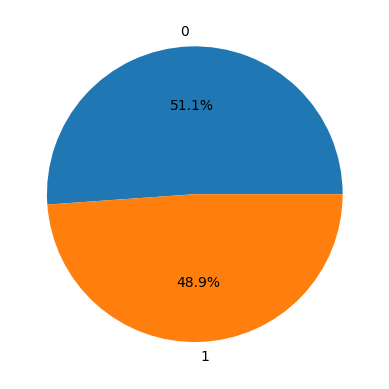

In [29]:
#piechart of target

plt.pie(data['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

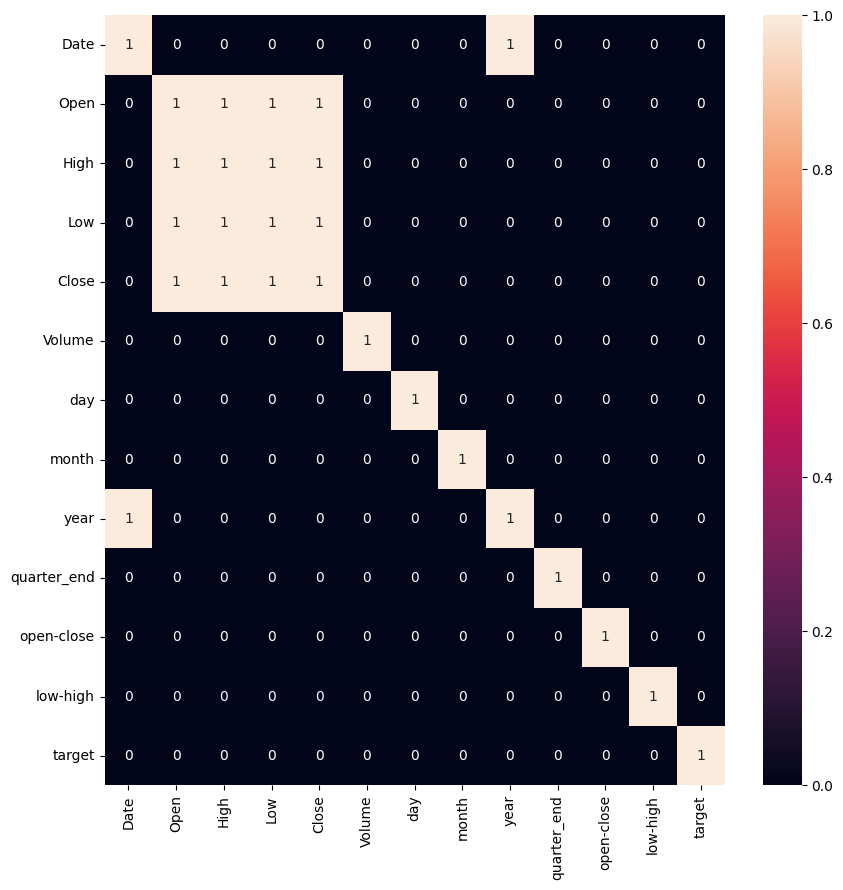

In [30]:
#adding new features to our dataset may result in highly correlated features and they do not help in the learning process of the algorithm.so let us check weather there are some highly correlated features.


plt.figure(figsize=(10, 10))

sns.heatmap(data.corr() > 0.9, annot= True)
plt.show()

In [31]:
#from the heatmap it is clear that the added features are not highly correlated with each other or previously provided features 

In [32]:
features = data[['open-close', 'low-high', 'quarter_end']]
target = data['target']

### Normalization ###

In [33]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

### Data Splitting ###

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_test.shape)

(2174, 3) (242, 3)


### Model Building

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(min_samples_leaf=5,random_state=42)
tree_clf.fit(X_train,y_train)
tree_clf.score(X_test,y_test) 

0.48760330578512395

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

voting_clf = VotingClassifier(
                              [('lor',LogisticRegression(random_state=42)),
                               ('rf',RandomForestClassifier(random_state=42)),
                               ('svc',SVC(random_state=42)),
                               ('XGBClassifier', XGBClassifier(random_state=42))]
                               )
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lor', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_me...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...))])

In [37]:
#clf score
for name,clf in voting_clf.named_estimators_.items():
    print(name,'-',clf.score(X_test,y_test))

lor - 0.5206611570247934
rf - 0.44214876033057854
svc - 0.5041322314049587
XGBClassifier - 0.3884297520661157


In [38]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=40,learning_rate=0.5,random_state=42)
ada_clf.fit(X_train,y_train)
ada_clf.score(X_test,y_test)

0.5165289256198347

As you can see the model that is performing best has an accuracy score of only 52%. This can be due to us using very simple models to predict the data or due to lack of data.